<a href="https://colab.research.google.com/github/ameliacaroline/-ameliacaroline-python-data-science-regression/blob/main/_REGRESS%C3%83O_LINEAR_BASE_DE_DADOS_BOSTON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando Matriz de Características e Vetor de Alvos a partir de um DF

*alvo = coluna "MEDV"*
*Matriz = todas as outras colunas*

**Criando Matriz de Características e
Vetor de Alvos a partir de um df**

In [ ]:
import pandas as pd
df_boston = pd.read_excel ('boston.xlsx')

In [ ]:
df_boston = pd.read_excel('boston.xlsx')
print(f"linhas:{df_boston.shape[0]}")
print(f"colunas:{df_boston.shape[1]}")

linhas:506
colunas:14


In [16]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.486526e+05,11.363636,11134.409486,0.069170,0.554695,62846.343874,68.574901,37950.426877,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.650846e+05,23.322453,6864.095557,0.253994,0.115878,7026.171434,28.148861,21057.101266,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,6.320000e-03,0.000000,0.460000,0.000000,0.385000,35610.000000,2.900000,11296.000000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,8.204500e-02,0.000000,5190.000000,0.000000,0.449000,58855.000000,45.025000,21001.750000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,2.565100e-01,0.000000,9690.000000,0.000000,0.538000,62085.000000,77.500000,32074.500000,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082e+05,12.500000,18100.000000,0.000000,0.624000,66235.000000,94.075000,51884.250000,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,8.897620e+06,100.000000,27740.000000,1.000000,0.871000,87800.000000,100.000000,121265.000000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    int64  
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [ ]:
#definindo o alvo = MEDV (a coluna de média de valores)
#todas as outras colunas serão Matriz
y = df_boston ['MEDV'].values
X = df_boston.drop ('MEDV', axis= 1).values 

*Predizendo o valor de uma casa a partir de uma variável preditora*
*Criar um gráfico para que a coluna RM (numero de quartos) seja a variável preditora (variavel independente, explanatoria ou variavel preditiva). E o y é a variável dependente (resposta, alvo).*

#Teste
(Criando a matriz–coluna X_rooms e redimensionando y)

• EDA dos dados com um scatter plot

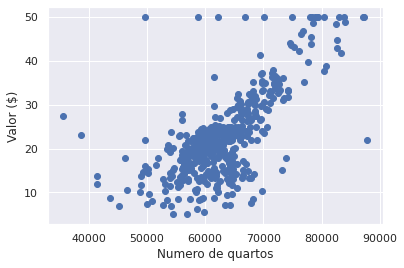

In [ ]:
#https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
import seaborn as sns
import matplotlib.pyplot as plt

X_rooms = X[:,5] #X é DF
X_rooms = X_rooms.reshape(-1,1) # -1 (número de linhas desconhecido)

y = y.reshape(-1,1)

sns.set()
plt.scatter(X_rooms, y)
plt.xlabel ('Numero de quartos') #variável independente
plt.ylabel('Valor ($)')
plt.show()

# AJUSTE DO MODELO DE REGRESSÃO 
*Ajuste da reta para os dados*
*Gráfico da reta*

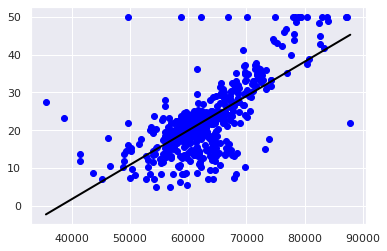

In [ ]:
import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y) #Parametro de treinamento: Na frente a variável preditora e depois o alvo.
plt.scatter(X_rooms, y, color='blue')
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1) 
plt.plot(prediction_space, reg.predict(prediction_space),color='black',linewidth=2)
plt.show()


# O Modelo de regressão
*y = ax + b*  (a e b são chamados parametros do modelo), (y e x são chamadas variáveis, sendo x a variável indenpendente e y a variável alvo)

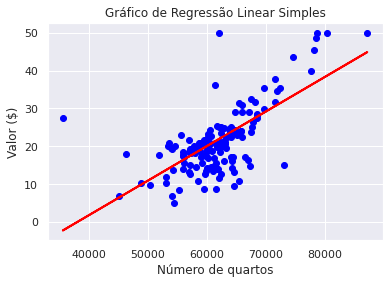

Regressão Linear Simples (OLS)
R²: 0.4584649934303068
0.4584649934303068


In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.3, random_state=42) #divisão do conjunto de dados em 30%

# Treinando o modelo com os dados de treinamento
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)   #como removi 30% dos dados de teste, tenho apenas 70% p/ testar

# Realizando as previsões com os dados de teste
y_pred = reg.predict(X_test)

# tentando plotar os pontos de dados de teste e a nova linha de regressão
plt.scatter(X_test.reshape(-1, 1), y_test.reshape(-1, 1), color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Gráfico de Regressão Linear Simples')
plt.xlabel('Número de quartos')
plt.ylabel('Valor ($)')
plt.show()

# avaliando o desempenho do modelo com o coeficiente de determinação
print('Regressão Linear Simples (OLS)')
r2_ols = reg.score(X_test, y_test)
print('R²:', r2_ols)

print(reg.score(X_test, y_test))

# Validação Cruzada (Cross-Validation)
*Fazendo a regressão com a CV dos dados do teste anterior com cv=5*

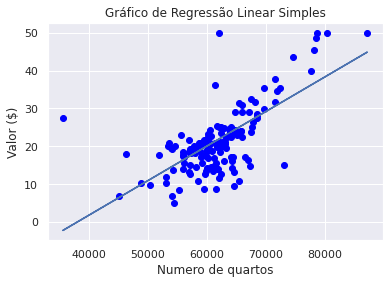

Regressão Linear Múltipla (OLS)
Desempenho: 0.4584649934303068
[ 0.63980891  0.71318181  0.58832674  0.08008802 -0.25116841]
Média do R² com validação cruzada: 0.3540474116328235


In [ ]:
from sklearn.model_selection import cross_val_score

# realizando a regressão linear simples
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

# realizando a regressão linear múltipla
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# realizando as previsões com os dados de teste
y_pred = reg.predict(X_test)
#pontos de dados de teste e a nova linha de regressão
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred)
# plotando os, color='red', linewidth=2)
plt.title('Gráfico de Regressão Linear Simples')
plt.xlabel('Numero de quartos')
plt.ylabel('Valor ($)')
plt.show()

# avaliando o desempenho do modelo com o coeficiente de determinação
print('Regressão Linear Múltipla (OLS)')
r2_ols

# avaliando o desempenho do modelo com o coeficiente de determinação
print('Desempenho:', reg.score(X_test, y_test))

# realizando a regressão com o cv
reg_cv = linear_model.LinearRegression()
cv_results = cross_val_score(reg_cv, X, y, cv=5)
print(cv_results)
print('Média do R² com validação cruzada:', np.mean(cv_results))


# Regressão Ridge


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Instanciando o modelo com alpha = 0.1 e normalização
ridge_reg = Ridge(alpha=0.1)  #aqui, não consegui utilizar a normalização "normalize=True"

# Treinando o modelo com dados de treinamento
ridge_reg.fit(X_train, y_train)

# Realizando previsões com os dados de teste
ridge_pred = ridge_reg.predict(X_test)


# Calculando a acurácia do modelo
print(ridge_reg.score(X_test, y_test))

# Utilizando cross validation para avaliar a performance do modelo
cv_results = cross_val_score(ridge_reg, X, y, cv=5)
print(cv_results)
print(np.mean(cv_results))

0.7104550054390295
[ 0.64391641  0.72275512  0.59643553  0.07974794 -0.23593055]
0.3613848910356644
